# IEOR 4703 -- Monte Carlo Simulation for FE

### Conjugate prior for the binomial distribution

$n$ is known, $\theta$ is unknown

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import beta as beta_fun

In [ ]:
class module(object):

    def __init__(self, ax, n=1, theta=0.1):

        # true parameters
        self.n = n
        self.theta = theta
        # set up plot parameters
        self.x = np.linspace(0, 1, 200)
        self.line, = ax.plot([], [], 'g-')
        self.ax = ax
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)
        self.ax.set_xlabel('$\\theta$')
        self.ax.set_ylabel('$p(\\theta \mid x)$')
        self.ax.set_title('$\\theta$ is unknown, $n$ is known')
        # this vertical line represents the theoretical value, to
        # which the plotted distribution should converge
        self.ax.axvline(self.theta, linestyle='--', color='red')

    def init(self):
        # hyperparameters (initial guess)
        self.alpha0 = 1
        self.beta0 = 1
        # line
        self.line.set_data(self.x, beta_fun.pdf(self.x, self.alpha0, self.beta0))
        return self.line,

    def __call__(self, i):
        if i == 0:
            return self.init()
        # sample from binomial and update the hyperparameters
        ySample = np.random.binomial(self.n, self.theta, 1)[0]
        # posterior
        alpha = self.alpha0 + ySample
        beta = self.beta0 + n - ySample
        y = beta_fun.pdf(self.x, alpha, beta)
        # update prior by using posterior as a prior
        self.alpha0 = alpha
        self.beta0 = beta
        self.line.set_data(self.x, y)
        return self.line,

<IPython.core.display.Javascript object>


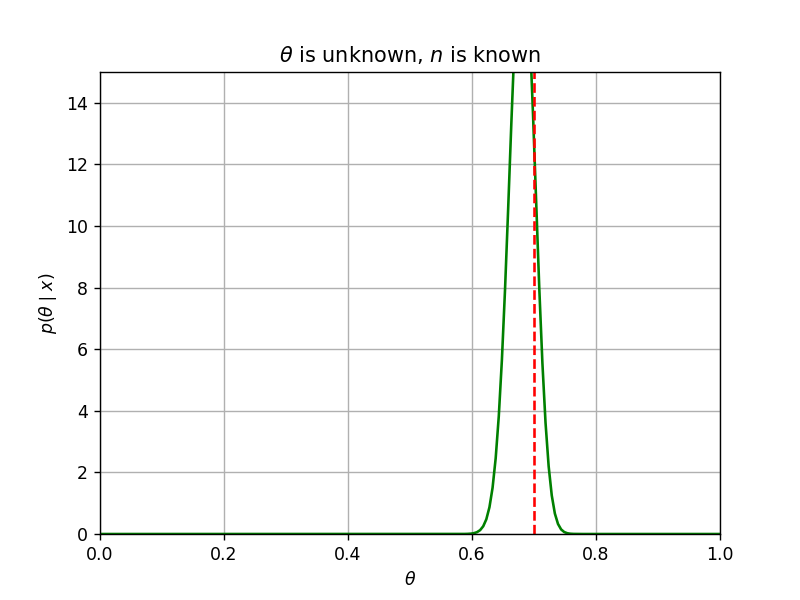

In [ ]:
num_obs = 500
# true params
n = 1
theta = 0.7

# run simulation
# cannot use inline mode
%matplotlib notebook
cycle_anim = False # the animation only runs once
fig, ax = plt.subplots()
ud = module(ax, n=n, theta=theta)
anim = FuncAnimation(fig, ud, frames=np.arange(num_obs), init_func=ud.init, interval=25, blit=True, repeat=cycle_anim)